# Importando Bibliotecas e o dataset

In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # transformação de daods
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # treino e teste de dados
from sklearn.linear_model import LogisticRegression # modelo de regressão
from sklearn.tree import DecisionTreeClassifier # modelo de arvore de decisão
from sklearn.ensemble import RandomForestClassifier # modelo de radom forest

from sklearn.metrics import accuracy_score # metrica de acuracia
from sklearn.metrics import classification_report, confusion_matrix # metrica de matriz de confusão
from sklearn.metrics import f1_score # metrica de f1-score

In [2]:
dataset = pd.read_csv('Dataset.csv') # importando o dataset

# Visualizando informações sobre o dataset e explorando

In [3]:
dataset.info() # visualizando informações sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               193 non-null    object 
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      190 non-null    object 
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB


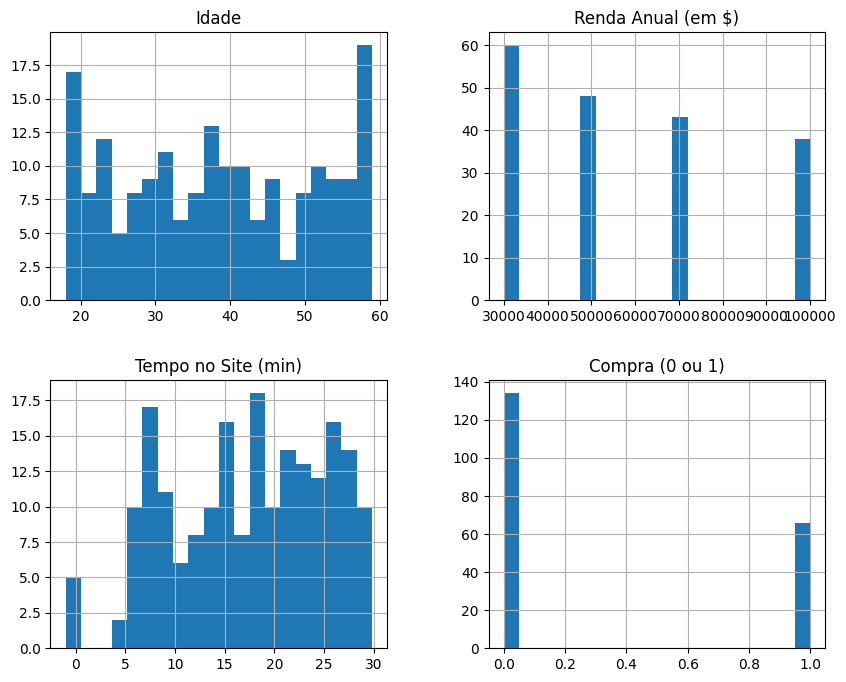

In [4]:
dataset.hist(bins=20, figsize=(10, 8))
plt.show() # histograma mostra alguns outliers na coluna tempo

# Utilizando o unique para verificar os outliers nos dados e também dados nulos

In [5]:
dataset['Compra (0 ou 1)'].unique() # sem outliers e nulo

array([0, 1])

In [6]:
dataset['Idade'].unique() # sem outliers, contém nulos

array([29., 58., 50., 21., 59., 24., 39., 34., 41., 51., 45., 56., 23.,
       18., 27., 38., 22., 19., 33., 57., 55., 52., 49., 37., 43., 32.,
       31., 44., 42., 20., 25., 40., 36., 28., 53., 54., 26., 35., nan,
       30., 46., 47., 48.])

In [7]:
dataset['Renda Anual (em $)'].unique() # contém nulos

array([ 30000.,  50000.,  70000., 100000.,     nan])

In [8]:
dataset['Gênero'].unique() # contém nulos

array(['Feminino', 'Masculino', nan], dtype=object)

In [9]:
dataset['Tempo no Site (min)'].unique() # contém outliers

array([ 5.74170558, 21.88550519,  6.1213392 , 16.26492547, 28.23566736,
        9.13009848, 14.74680882, 23.24650772, 27.0564639 , 21.77357512,
       11.45433135, 21.86519632, 12.41819103, 22.96073075, 28.85082819,
       23.03483628, 26.57201257,  5.05259608, 22.93930312, 25.73968892,
        6.01396844, 26.78994318, 11.41735571, 21.63230255, 25.00887198,
       21.56661283,  7.3071198 , 19.90803797, 18.73959142, 27.5080317 ,
       15.10599324, 13.02702743, 23.74626911, 15.31688315, 21.15240438,
       21.16125225, 27.20097661, 19.96731006, 17.55384025,  8.47178316,
        7.89344017,  8.85803913,  9.29621203, 20.94692732, 23.52453126,
       18.24978807, 25.72544331, 29.78158067, 25.50031573, 22.37205934,
       18.31231749, 16.22132679,  7.10980951, 14.98421871, 27.75336592,
       25.20056575, 10.40128413, 16.66519462, 25.41808006,  6.68461387,
       14.68481464, 26.29603092, 15.0974466 ,  6.94036612, 18.56335921,
       26.54356237, 19.75713857, 10.65697771, 14.6059905 , 16.25

In [10]:
dataset['Anúncio Clicado'].unique() # contém nulos

array(['Não', 'Sim', nan], dtype=object)

# Explorando alguns dados agrupados

In [11]:
dataset.groupby('Gênero')['Compra (0 ou 1)'].value_counts()
# quantidade de comprandares separados por genero

Gênero     Compra (0 ou 1)
Feminino   0                  63
           1                  31
Masculino  0                  66
           1                  33
Name: count, dtype: int64

In [12]:
dataset.groupby('Renda Anual (em $)')['Compra (0 ou 1)'].value_counts()
# contagem para verificar se a renda anual tem influencia com a compra

Renda Anual (em $)  Compra (0 ou 1)
30000.0             0                  38
                    1                  22
50000.0             0                  34
                    1                  14
70000.0             0                  28
                    1                  15
100000.0            0                  27
                    1                  11
Name: count, dtype: int64

# Alterando os dados de objeto para numeros

In [13]:
le = LabelEncoder() # Usando LabelEncoder para transformar as variáveis no dataset

In [14]:
dataset['Gênero'] = le.fit_transform(dataset['Gênero'])
dataset['Anúncio Clicado'] = le.fit_transform(dataset['Anúncio Clicado'])
# Transformando as variáveis categóricas em valores numéricos no dataset

In [15]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               200 non-null    int64  
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      200 non-null    int64  
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 9.5 KB


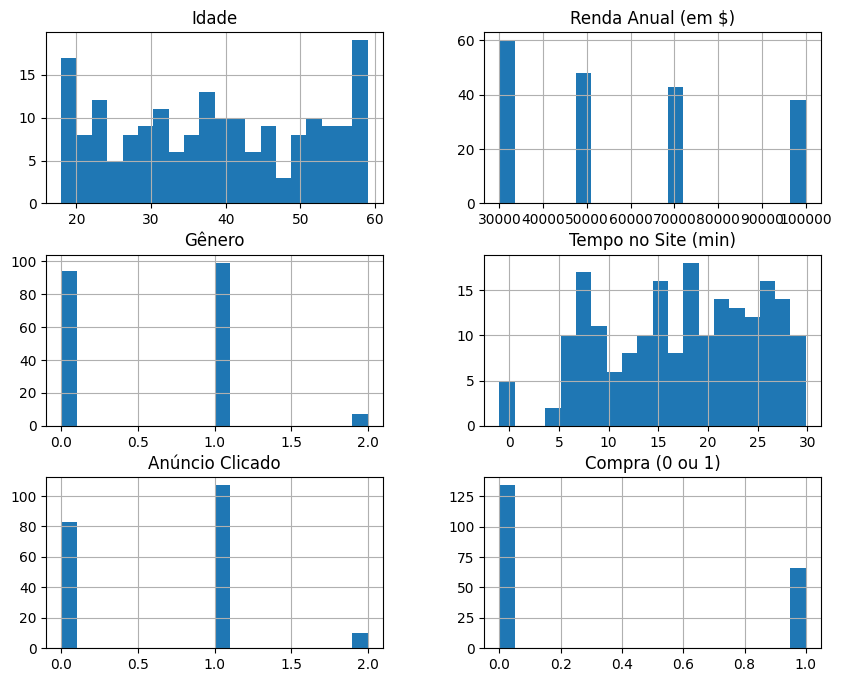

In [16]:
dataset.hist(bins=20, figsize=(10, 8))
plt.show() # verificando o histograma, e visualizando outliers

# Excluindo dados nulos e outliers

In [17]:
dataset = dataset[dataset['Tempo no Site (min)'] != 0]
dataset = dataset[dataset['Gênero'] != 2.0]
dataset = dataset[dataset['Anúncio Clicado'] != 2.0]
# Excluindo otliers do dataset

In [18]:
dataset = dataset.dropna() # excluindo todas as linhas com valores nulos

In [19]:
dataset.info() # verificando

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                167 non-null    float64
 1   Renda Anual (em $)   167 non-null    float64
 2   Gênero               167 non-null    int64  
 3   Tempo no Site (min)  167 non-null    float64
 4   Anúncio Clicado      167 non-null    int64  
 5   Compra (0 ou 1)      167 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 9.1 KB


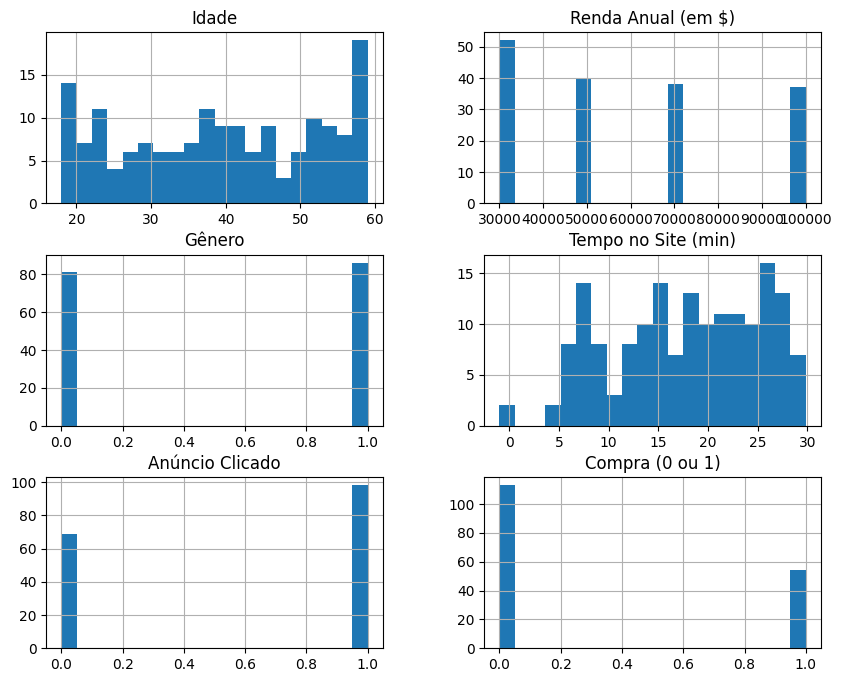

In [20]:
dataset.hist(bins=20, figsize=(10, 8))
plt.show() # verificando o histograma, sem outliers.

# Verificando se há correlação entre as variáveis

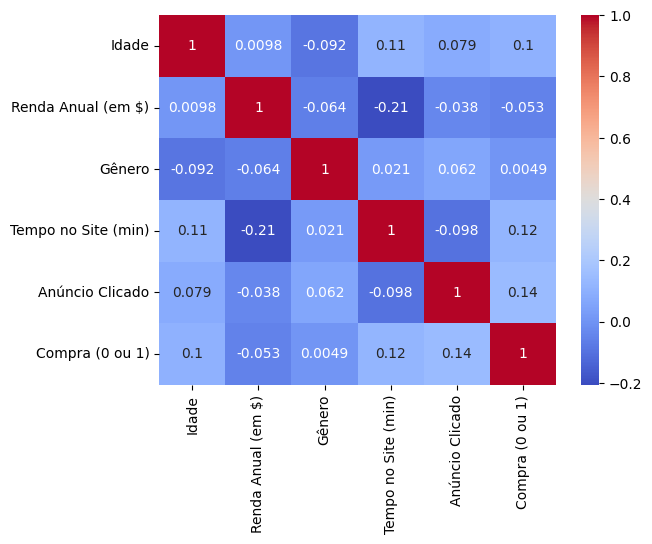

In [21]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show() # correlação das variaves 

# Definindo as variáveis de treino e teste

In [22]:
# Separando variáveis
X = dataset.drop('Compra (0 ou 1)', axis=1)
y = dataset['Compra (0 ou 1)']

# Padronizando as variáveis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=1000)

# Criando e treinando um modelo de regressão

In [23]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_pred_regressao = modelo.predict(X_test)
print(accuracy_score(y_test, y_pred_regressao)) # acuracia

0.6666666666666666


In [25]:
print(confusion_matrix(y_test, y_pred_regressao)) # matriz de confusão

[[6 0]
 [3 0]]


In [26]:
print(f1_score(y_test, y_pred_regressao, zero_division=0)) # f1-score

0.0


# Criando e treinando um modelo de arvore de decisão

In [27]:
modelo_arvore = DecisionTreeClassifier(random_state=1000)
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1000)

In [28]:
y_pred_arvore = modelo_arvore.predict(X_test)
print(accuracy_score(y_test, y_pred_arvore))

0.8888888888888888


In [29]:
print(confusion_matrix(y_test, y_pred_arvore))

[[5 1]
 [0 3]]


In [30]:
print(f1_score(y_test, y_pred_arvore, zero_division=0)) # f1-score

0.8571428571428571


# Criando e treinando um modelo de random forest

In [31]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=1000)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

In [32]:
y_pred_modelo_rf = modelo_rf.predict(X_test)
print(accuracy_score(y_test, y_pred_modelo_rf))

0.6666666666666666


In [33]:
print(confusion_matrix(y_test, y_pred_modelo_rf))

[[5 1]
 [2 1]]


In [34]:
print(f1_score(y_test, y_pred_modelo_rf, zero_division=0))

0.4
